Text(0, 0.5, 'Amplitude')

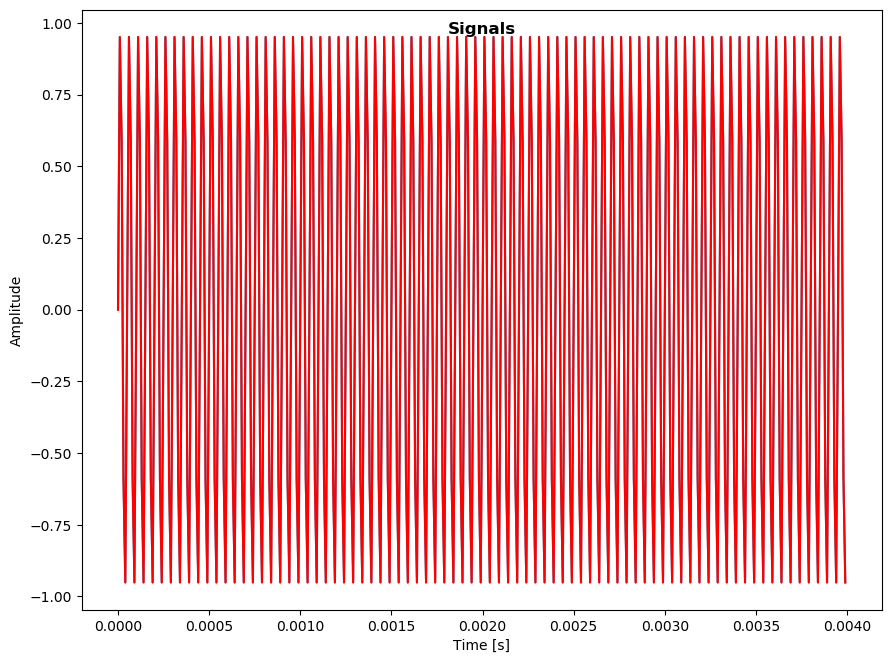

In [120]:
#This notebook explores serrodyne modulation and changing frequency via phase shift

#Preliminary imports and settings
import math
import numpy
import scipy
import sys
from decimal import Decimal
from scipy import signal
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams['figure.dpi'] = 100



#For starters, lets create a pair of sine waves, one with static phase and one we will use
#for varying phase
fsamp = 100000
samplength = 400
m = 0
signal = []
signal2 = []
while m < samplength:
    signal.append(math.sin(2*math.pi*20000/fsamp*m))
    signal2.append(math.sin(2*math.pi*20000/fsamp*m))
    #signal.append(0)
    m += 1
signalaxis = []
m = 0
while m < len(signal):
    signalaxis.append(m/fsamp)
    m += 1
    
#Now plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(signalaxis,signal)
ax.plot(signalaxis,signal2,'r')

fig.suptitle('Signals', fontweight='bold') 
ax.set_xlabel('Time [s]') 
ax.set_ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

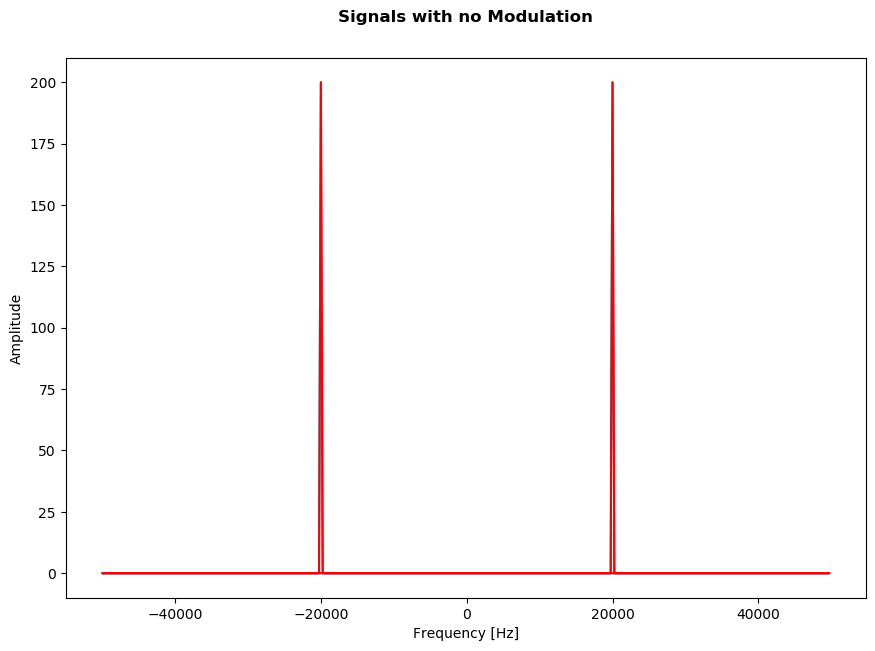

In [121]:
#Let's also plot the amplitude spectra of the signals

wavefreq = abs(scipy.fft(signal))
freqaxis = []

wavefreq2 = abs(scipy.fft(signal2))

freqaxis = list(numpy.fft.fftfreq(len(signal), d=1/fsamp))

fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(freqaxis,wavefreq)
ax.plot(freqaxis,wavefreq2,'r')

fig.suptitle('Signals with no Modulation', fontweight='bold') 
ax.set_xlabel('Frequency [Hz]') 
ax.set_ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

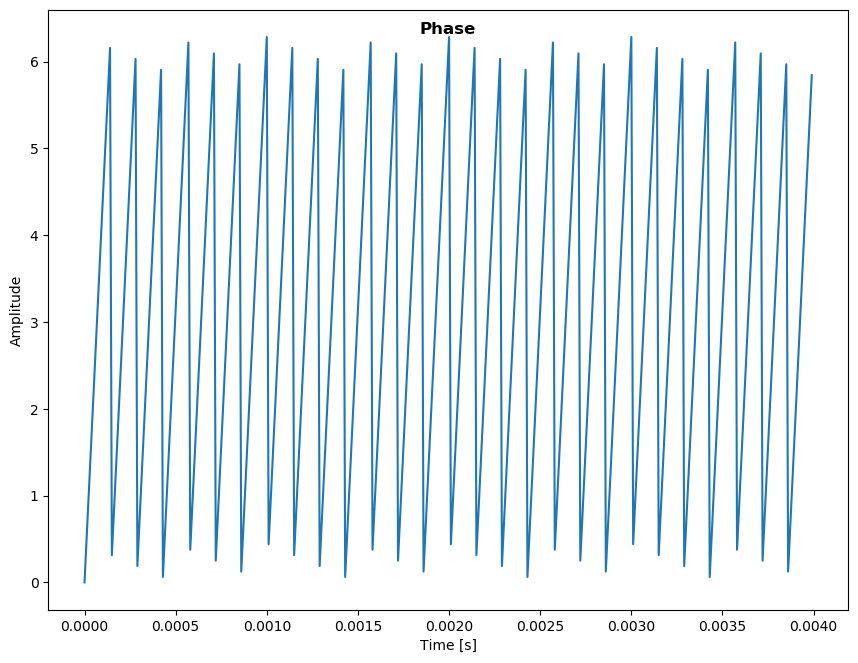

In [122]:
#Ok, these two signals are identical.  Now, let's change signal 2 so that it has a phase that varies with time.
#To start with, we need to generate a phase ramp signal that varies from 0 to 2*pi radians
#The phase ramp needs to be 360 degrees/s to add 1 Hz to the signal

n = 0
modfreq = 7000
modrate = modfreq*(math.pi*2)/fsamp

pramp = []
while n < samplength:
    pramp.append(math.fmod(n*modrate,2*math.pi))
    n += 1
    
#Now plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(signalaxis,pramp)

fig.suptitle('Phase', fontweight='bold') 
ax.set_xlabel('Time [s]') 
ax.set_ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

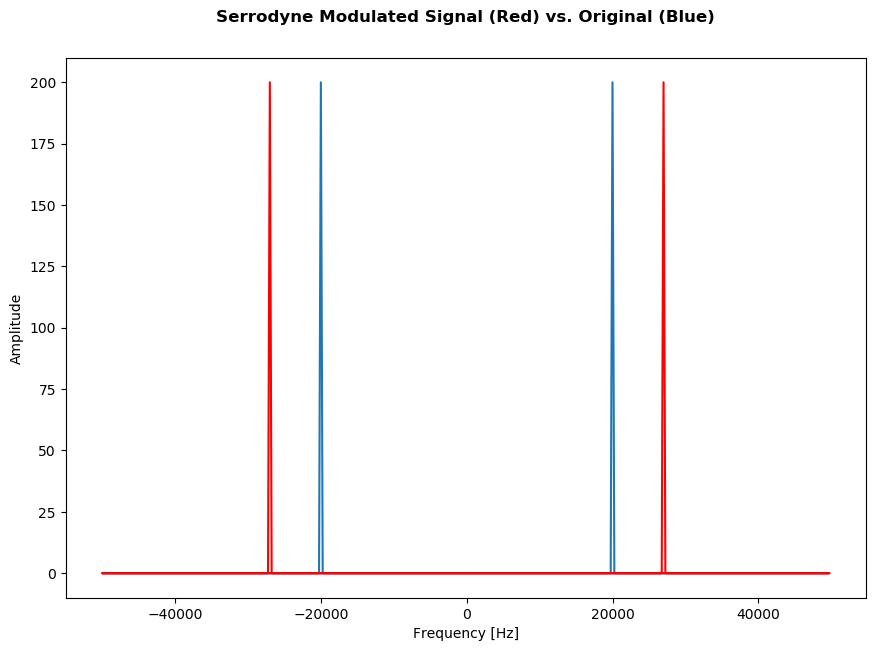

In [123]:
#Ok, we have a phase that is changing with time, lets add it into signal 2

m = 0
signal2 = []
while m < samplength:
    signal2.append(math.sin(2*math.pi*20000/fsamp*m+pramp[m]))
    m += 1

#Now take Fourier transform and plot signal vs. signal 2

wavefreq = abs(scipy.fft(signal))
freqaxis = []

wavefreq2 = abs(scipy.fft(signal2))

freqaxis = list(numpy.fft.fftfreq(len(signal), d=1/fsamp))

fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(freqaxis,wavefreq)
ax.plot(freqaxis,wavefreq2,'r')

fig.suptitle('Serrodyne Modulated Signal (Red) vs. Original (Blue)', fontweight='bold') 
ax.set_xlabel('Frequency [Hz]') 
ax.set_ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

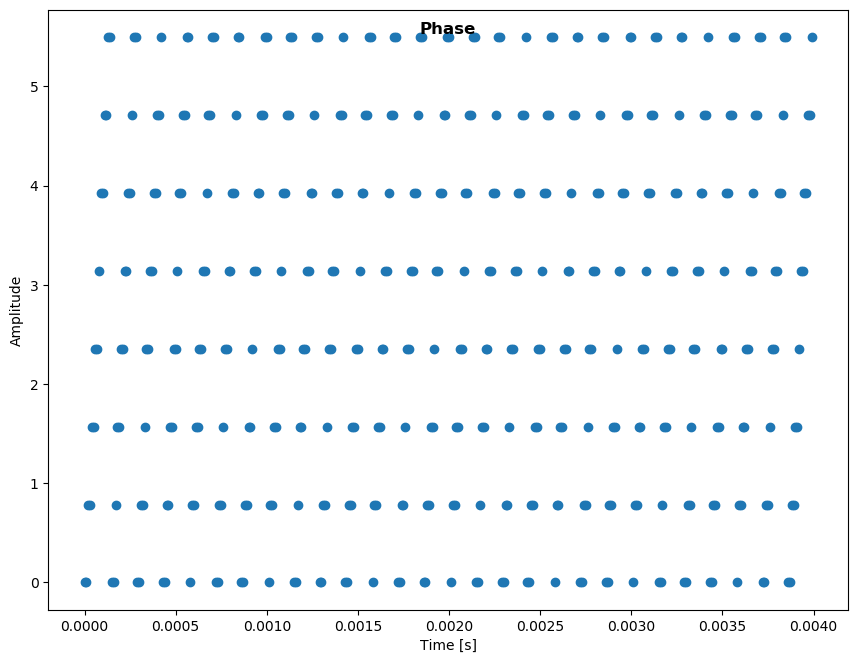

In [124]:
#Ok, lets see what happens if you implemented this in hardware with a discrete phase shifter.

nbits = 3

#Phase shifter resolution is 360/(2^nbits), or 2pi/(2^nbits)

res = 2*math.pi/(pow(2,nbits))

#Now, translate phase ramp into quantized ramp of nbits resolution

m = 0
while m < samplength:
    n = 1
    while n <= pow(2,nbits):
        if (pramp[m] < n*res):
            pramp[m] = (n-1)*res
            break
        n += 1
    m += 1

#Now lets look at our quantized phase ramp
#Now plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(signalaxis,pramp,'o')

fig.suptitle('Phase', fontweight='bold') 
ax.set_xlabel('Time [s]') 
ax.set_ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

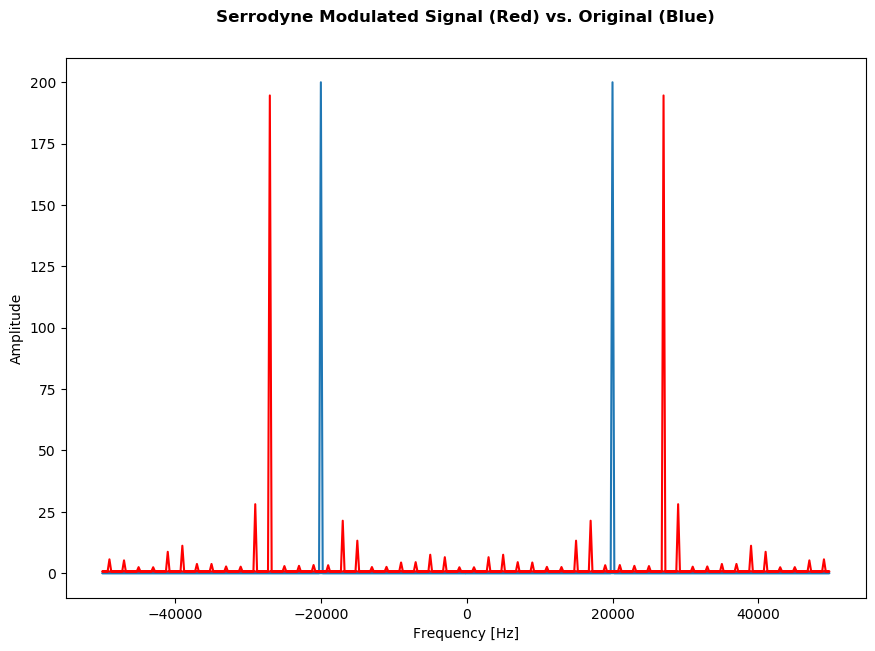

In [125]:
#Ok, now, does the quantization result in spurs in our frequency response?

m = 0
signal2 = []
while m < samplength:
    signal2.append(math.sin(2*math.pi*20000/fsamp*m+pramp[m]))
    m += 1

#Now take Fourier transform and plot signal vs. signal 2

wavefreq = abs(scipy.fft(signal))
freqaxis = []

wavefreq2 = abs(scipy.fft(signal2))

freqaxis = list(numpy.fft.fftfreq(len(signal), d=1/fsamp))

fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(freqaxis,wavefreq)
ax.plot(freqaxis,wavefreq2,'r')

fig.suptitle('Serrodyne Modulated Signal (Red) vs. Original (Blue)', fontweight='bold') 
ax.set_xlabel('Frequency [Hz]') 
ax.set_ylabel('Amplitude')

Text(0, 0.5, 'Amplitude (dB)')

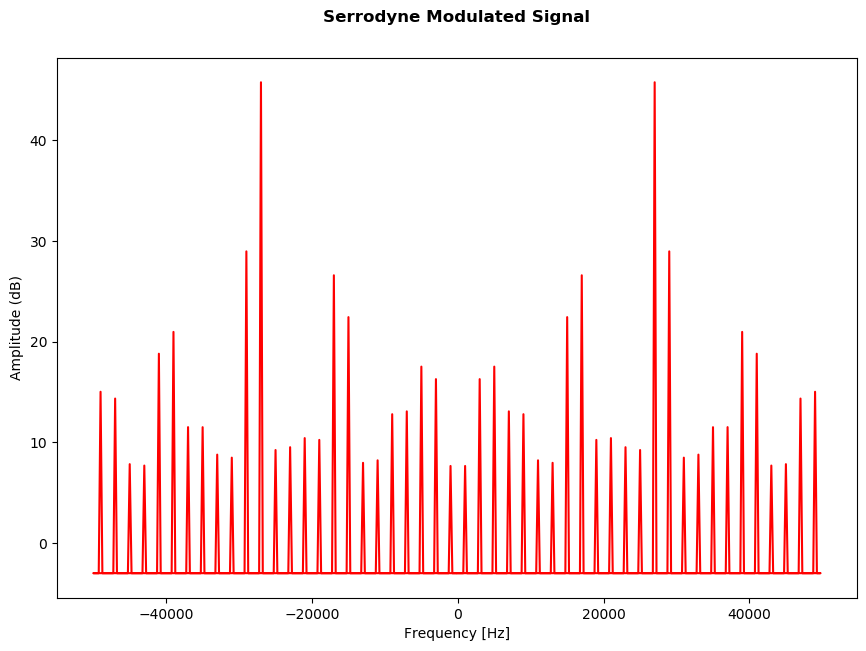

In [126]:
#Lets take a look in dB

m = 0
signaldB = []
while m < len(wavefreq2):
    signaldB.append(20*math.log10(wavefreq2[m]))
    m += 1
    
fig.clear()
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
ax.plot(freqaxis,signaldB,'r')

fig.suptitle('Serrodyne Modulated Signal', fontweight='bold') 
ax.set_xlabel('Frequency [Hz]') 
ax.set_ylabel('Amplitude (dB)')